## Support Vector Machines

Support Vector Machines are linear classifiers that find very robust classifiers. In particular, they maximize the margin between the decision boundary and the positive/negative examples.

This decision boundary is described by a weighted combination of a set of border examples, the so called Support Vectors.

SVMs can be extended to non-linear classifiers using so called Kernel Methods (out of scope here)

<p>

<div class="alert alert-info">
Support Vector Machines are usually a very good choice for classification tasks due to their robustnes against irrelevant features and noisy examples, especially in high-dimensional input spaces.
</div>

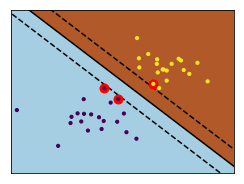

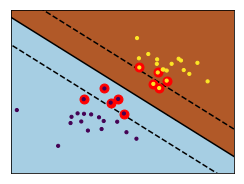

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='red', zorder=9)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, s=10)

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
np.random.seed(0)
indices = np.random.permutation(len(iris.data))
iris_X_train = iris.data[indices[:-10]]
iris_y_train = iris.target[indices[:-10]]
iris_X_test  = iris.data[indices[-10:]]
iris_y_test  = iris.target[indices[-10:]]


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
print ("Predicted flower classes:\t", svc.predict(iris_X_test))
print ("True flower classes     :\t", iris_y_test)
print ("correct classifciation? :\t", svc.predict(iris_X_test) == iris_y_test)
print ("classifc. error (in %)  :\t", \
      np.sum(svc.predict(iris_X_test) == iris_y_test)*100.0\
      /len(iris_y_test))

Predicted flower classes:	 [1 2 1 0 0 0 2 1 2 0]
True flower classes     :	 [1 1 1 0 0 0 2 1 2 0]
correct classifciation? :	 [ True False  True  True  True  True  True  True  True  True]
classifc. error (in %)  :	 90.0
